In [118]:
from Poisson import PoissonModel
from allocation import allocator
from hist_retrieval import hist_retriever
from allocation import allocator
from clustering import clusterer
from itertools import chain
import cPickle as pickle
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Create a Dataframe and drop extra column
df = pd.read_csv('../data/seattle_911_prepped_no_out.csv', low_memory=False)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# Load pickled Poisson model
with open('PoissonModel.pkl', 'rb') as pkl_object:
    model = pickle.load(pkl_object)   

In [119]:
query = {'date_input': '2016-11-20', 'num_units': 25, 
         'home_game': 'no_game', 'time_range': 1}

In [120]:
preds = model.predict(query)
preds

[('zone1', 27.071635369578186),
 ('zone2', 21.688772357284236),
 ('zone3', 14.497173010694627),
 ('zone4', 25.635318101693684),
 ('zone5', 34.141682123478716),
 ('zone6', 17.699402808556837),
 ('zone7', 24.619172720166151)]

In [121]:
alloc = allocator(query["num_units"], preds)
alloc

{'zone1': 4.0,
 'zone2': 4.0,
 'zone3': 4.0,
 'zone4': 3.0,
 'zone5': 4.0,
 'zone6': 3.0,
 'zone7': 3.0}

In [122]:
# Homegames
mariners, seahawks, sounders = 0,0,0
if query['home_game'] == 'mariners':
    mariners = 1
if query['home_game'] == 'seahawks':
    seahawks = 1
if query['home_game'] == 'sounders':
    sounders = 1

    
df1 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone1')
df2 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone2')
df3 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone3')
df4 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone4')
df5 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone5')
df6 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone6')
df7 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone7')

In [123]:
# Find centroids with clusterer
centroids1, clusters1 = clusterer(df1, int(alloc['zone1']))
centroids2, clusters2 = clusterer(df2, int(alloc['zone2']))
centroids3, clusters3 = clusterer(df3, int(alloc['zone3']))
centroids4, clusters4 = clusterer(df4, int(alloc['zone4']))
centroids5, clusters5 = clusterer(df5, int(alloc['zone5']))
centroids6, clusters6 = clusterer(df6, int(alloc['zone6']))
centroids7, clusters7 = clusterer(df7, int(alloc['zone7']))

data length = 3834
converged after 6 iterations
data length = 2941
converged after 13 iterations
data length = 2075
converged after 15 iterations
data length = 3371
converged after 9 iterations
data length = 4506
converged after 17 iterations
data length = 2501
converged after 16 iterations
data length = 3323
converged after 22 iterations


In [124]:
# Combine centroids and create DataFrame of locations
def comb_centroids(centroids1, centroids2, centroids3, centroids4,
                   centroids5, centroids6, centroids7):
    centroids = list(chain(centroids1, centroids2, centroids3, centroids4,
                           centroids5, centroids6, centroids7))
    centroid_df = pd.DataFrame(centroids)
    centroid_df.columns = ['Latitude', 'Longitude']
    return centroid_df

In [125]:
# No limit of historical data size
cent_nolim = comb_centroids(centroids1, centroids2, centroids3, centroids4,
                            centroids5, centroids6, centroids7)
cent_nolim

,Latitude,Longitude
0,47.695522,-122.351693
1,47.722291,-122.348011
2,47.662351,-122.340991
3,47.674026,-122.382433
4,47.663907,-122.310347
5,47.703538,-122.316776
6,47.721461,-122.297857
7,47.678048,-122.280511
8,47.646667,-122.389317
9,47.623634,-122.348374


In [85]:
# Limit 1000 
cent_1000 = comb_centroids(centroids1, centroids2, centroids3, centroids4,
                            centroids5, centroids6, centroids7)
cent_1000

,Latitude,Longitude
0,47.662887,-122.340151
1,47.673828,-122.381702
2,47.722289,-122.347934
3,47.695812,-122.351059
4,47.677197,-122.280415
5,47.721398,-122.297664
6,47.703630,-122.317370
7,47.664063,-122.311406
8,47.640012,-122.337489
9,47.623744,-122.348120


In [116]:
# Limit 500
cent_500 = comb_centroids(centroids1, centroids2, centroids3, centroids4,
                            centroids5, centroids6, centroids7)
cent_500

,Latitude,Longitude
0,47.673260,-122.381941
1,47.695746,-122.352833
2,47.722162,-122.347120
3,47.663696,-122.339966
4,47.662322,-122.311800
5,47.722092,-122.298357
6,47.703303,-122.316899
7,47.674425,-122.283740
8,47.628177,-122.334710
9,47.623474,-122.353453


In [108]:
# Limit 250
cent_250 = comb_centroids(centroids1, centroids2, centroids3, centroids4,
                            centroids5, centroids6, centroids7)
cent_250

,Latitude,Longitude
0,47.660341,-122.344167
1,47.693727,-122.348918
2,47.678365,-122.383995
3,47.722377,-122.348009
4,47.662115,-122.310251
5,47.720600,-122.298275
6,47.679861,-122.286762
7,47.703575,-122.317305
8,47.623374,-122.352599
9,47.638079,-122.361817


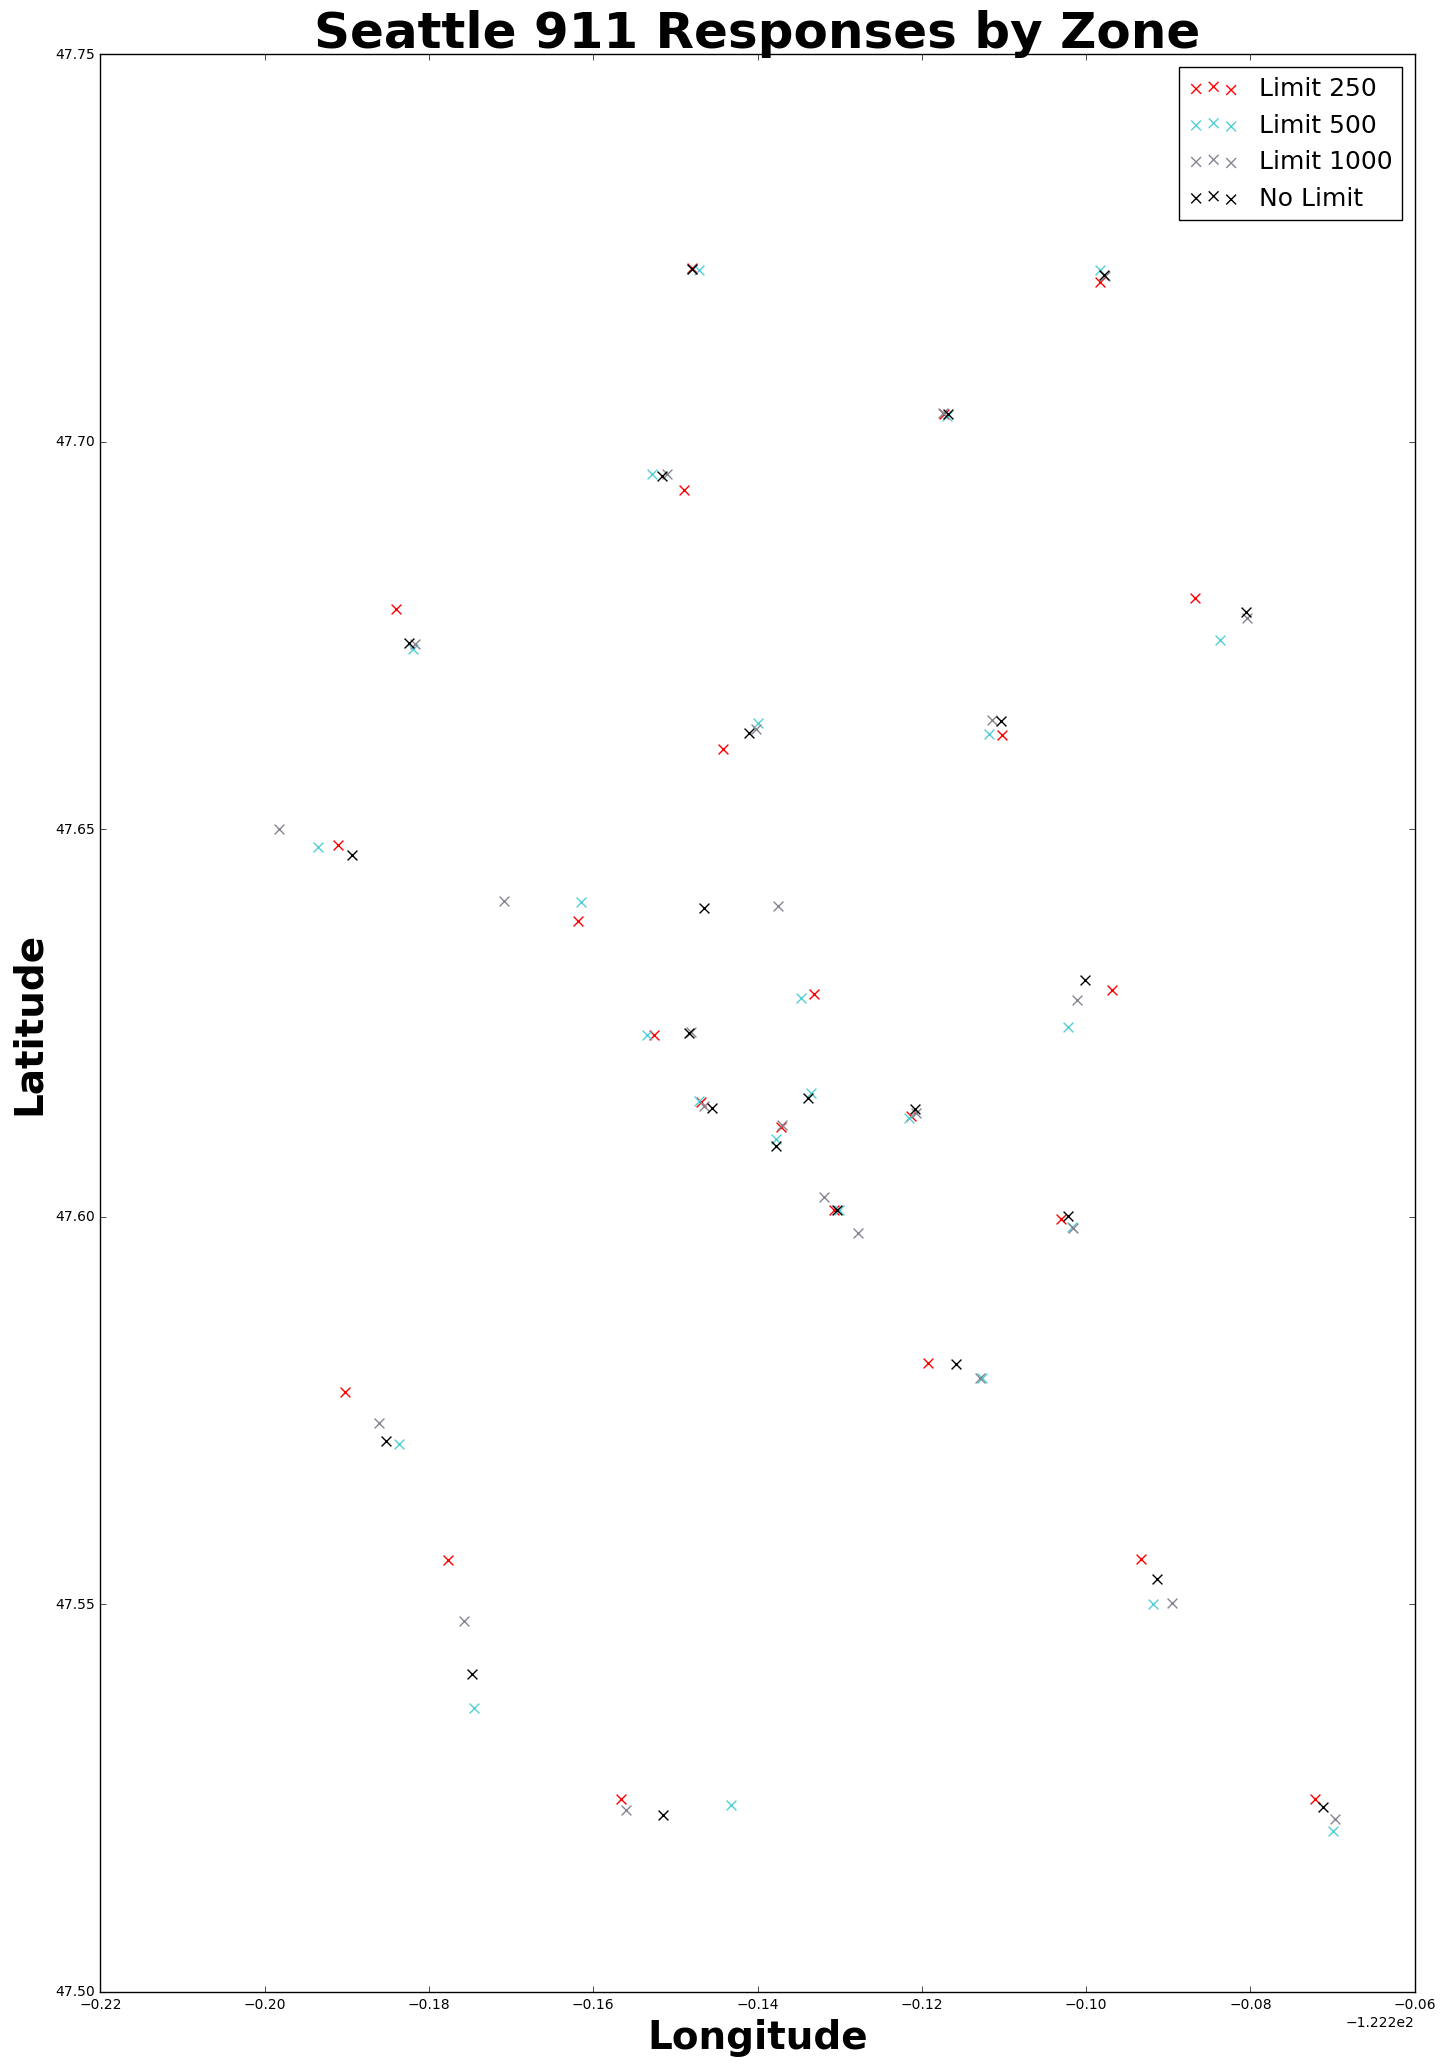

In [126]:
# Create and save a scatter plot (map) of 911 calls by zone
plt.figure(figsize=(16.96,25))
# plt.scatter(x=df1.Longitude, y=df1.Latitude, color='m', s=30, alpha=0.4)
# plt.scatter(x=df2.Longitude, y=df2.Latitude, color='orange', s=30, alpha=0.4)
# plt.scatter(x=df3.Longitude, y=df3.Latitude, color='#38d159', s=30, alpha=0.4)
# plt.scatter(x=df4.Longitude, y=df4.Latitude, color='b', s=30, alpha=0.4)
plt.scatter(x=cent_250.Longitude, y=cent_250.Latitude, color='r', s=50, marker='x')
plt.scatter(x=cent_500.Longitude, y=cent_500.Latitude, color='#53cfd6', s=50, marker='x')
plt.scatter(x=cent_1000.Longitude, y=cent_1000.Latitude, color='#868591', s=50, marker='x')
plt.scatter(x=cent_nolim.Longitude, y=cent_nolim.Latitude, s=50, color='k', marker='x')
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Responses by Zone', fontsize=36, fontweight='bold')
plt.legend(['Limit 250', 'Limit 500', 'Limit 1000', 'No Limit'], fontsize=18)

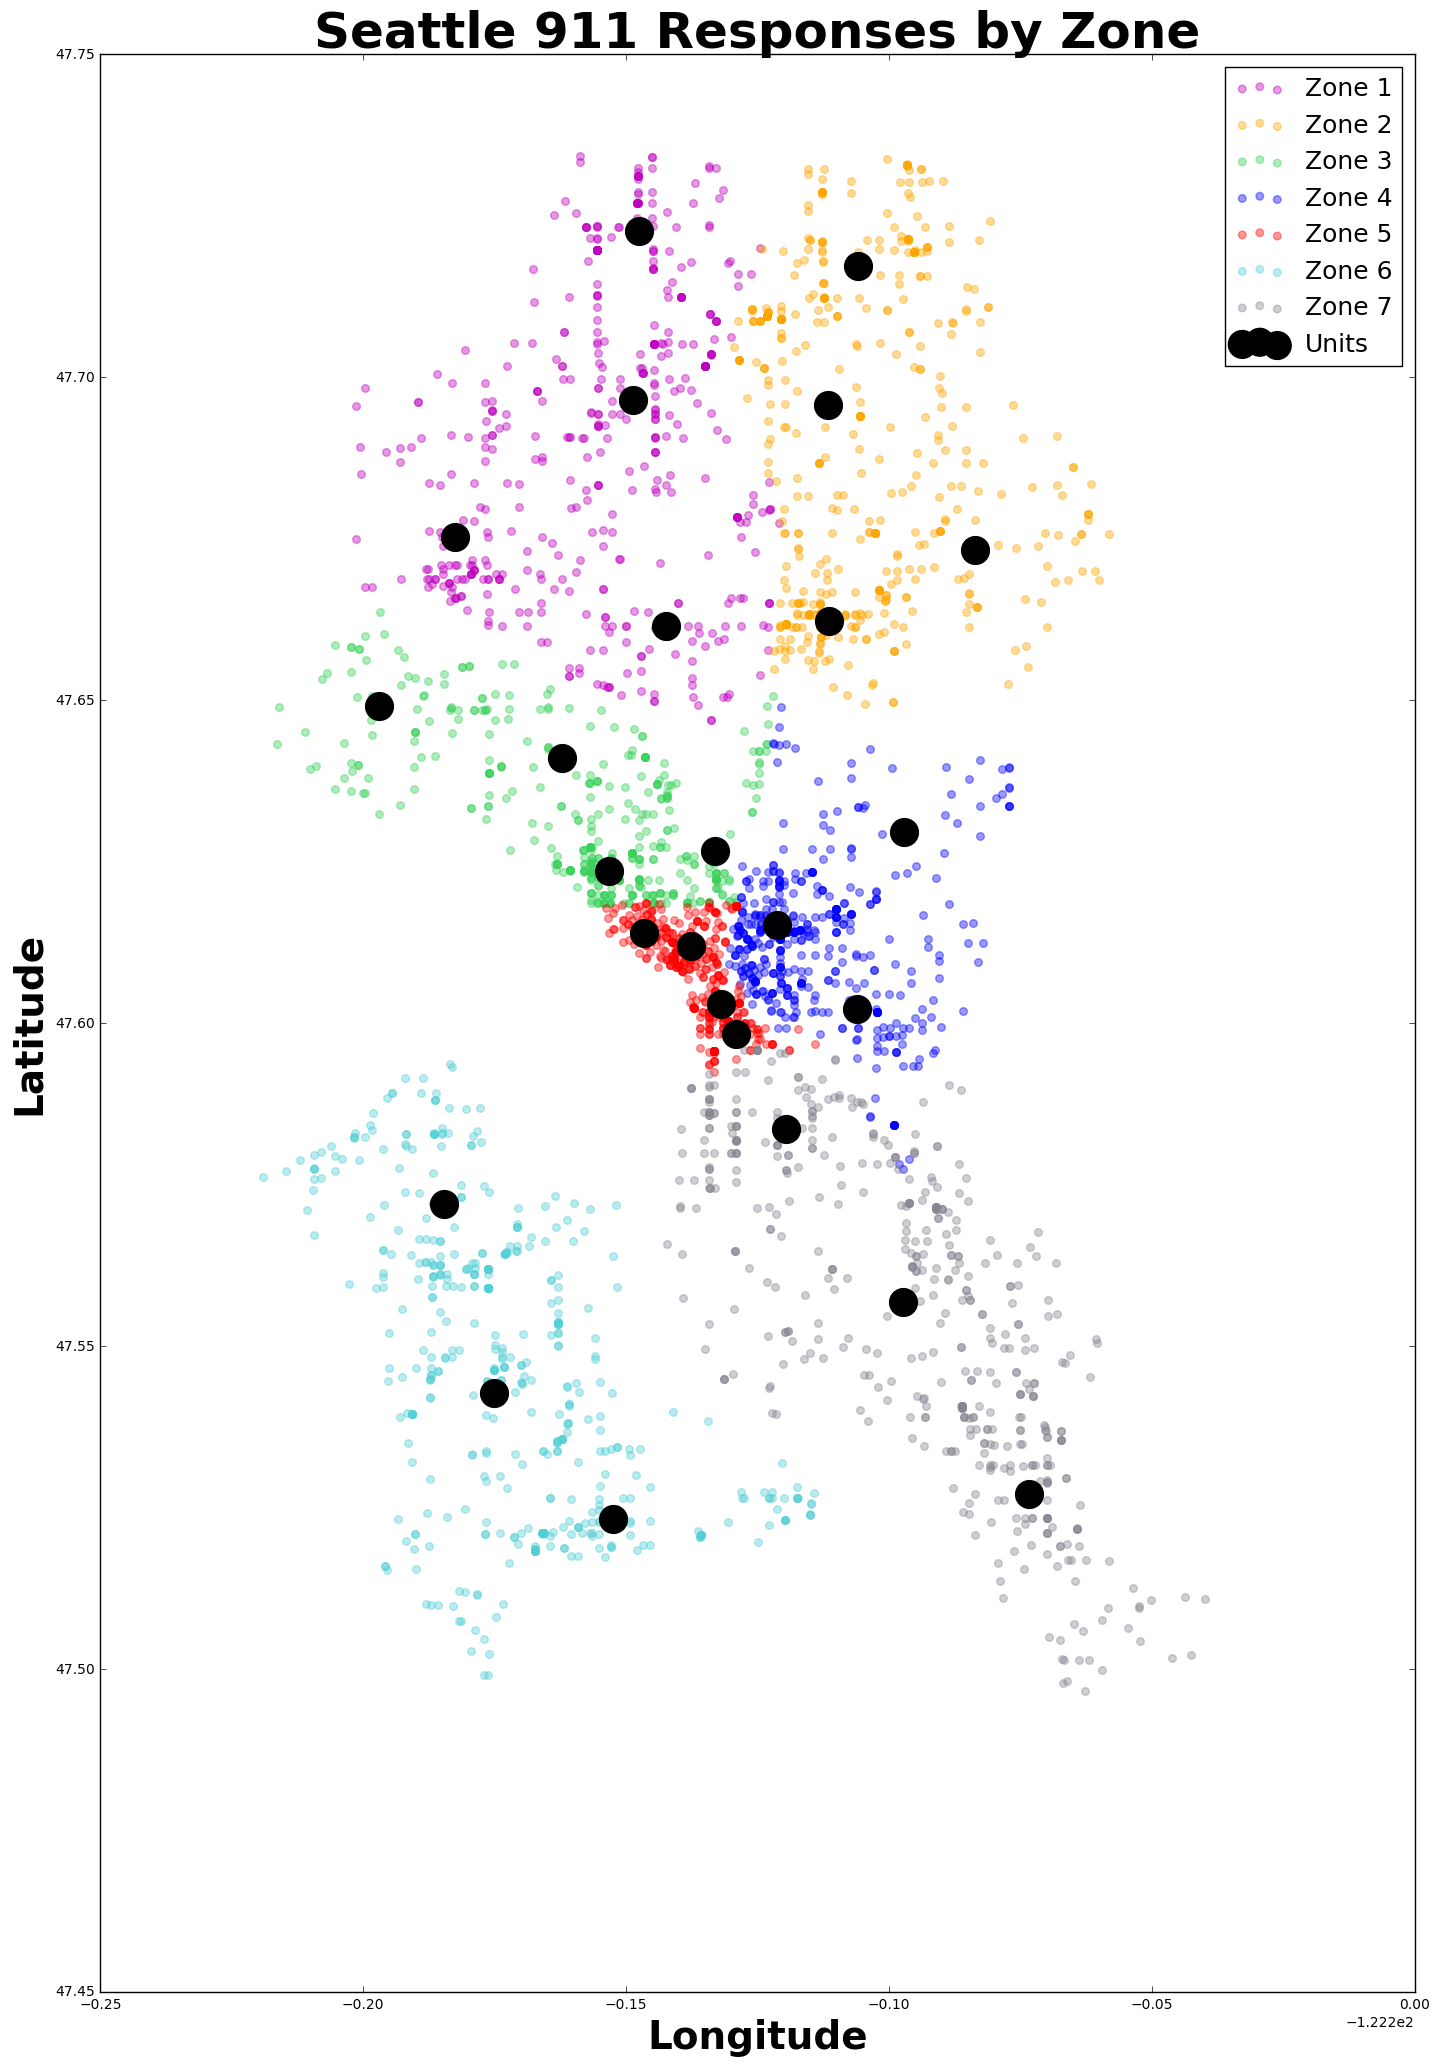

In [134]:
# Create and save a scatter plot (map) of 911 calls by zone
plt.figure(figsize=(16.96,25))
plt.scatter(x=df1.Longitude, y=df1.Latitude, color='m', s=30, alpha=0.4)
plt.scatter(x=df2.Longitude, y=df2.Latitude, color='orange', s=30, alpha=0.4)
plt.scatter(x=df3.Longitude, y=df3.Latitude, color='#38d159', s=30, alpha=0.4)
plt.scatter(x=df4.Longitude, y=df4.Latitude, color='b', s=30, alpha=0.4)
plt.scatter(x=df5.Longitude, y=df5.Latitude, color='r', s=30, alpha=0.4)
plt.scatter(x=df6.Longitude, y=df6.Latitude, color='#53cfd6', s=30, alpha=0.4)
plt.scatter(x=df7.Longitude, y=df7.Latitude, color='#868591', s=30, alpha=0.4)
plt.scatter(centroid_df.Longitude, centroid_df.Latitude, s=300, color='k')
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Responses by Zone', fontsize=36, fontweight='bold')
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5', 'Zone 6', 'Zone 7', 'Units'], fontsize=18)
#plt.savefig('../app/static/seattle_911_pred_live.png')

In [133]:
%time
# Testing time to run
teams = ['no_game', 'mariners', 'sounders', 'seahawks']
test_dict = {}
for team in teams:
    for time in xrange(0,1):
        query = {'date_input': '2016-11-20', 'num_units': 1, 
                 'home_game': team, 'time_range': time}
        preds = model.predict(query)
        mariners, seahawks, sounders = 0,0,0
        if query['home_game'] == 'mariners':
            mariners = 1
        if query['home_game'] == 'seahawks':
            seahawks = 1
        if query['home_game'] == 'sounders':
            sounders = 1
        df1 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                 query['time_range'], 'zone1', limit=True)
        df2 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                 query['time_range'], 'zone2', limit=True)
        df3 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                 query['time_range'], 'zone3', limit=True)
        df4 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                 query['time_range'], 'zone4', limit=True)
        df5 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                 query['time_range'], 'zone5', limit=True)
        df6 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                 query['time_range'], 'zone6', limit=True)
        df7 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                 query['time_range'], 'zone7', limit=True)
        for unit in xrange(1,40):
            print unit
            query['num_units'] = unit
            alloc = allocator(unit, preds)

            # Find centroids with clusterer
            centroids1, clusters1 = clusterer(df1, int(alloc['zone1']))
            centroids2, clusters2 = clusterer(df2, int(alloc['zone2']))
            centroids3, clusters3 = clusterer(df3, int(alloc['zone3']))
            centroids4, clusters4 = clusterer(df4, int(alloc['zone4']))
            centroids5, clusters5 = clusterer(df5, int(alloc['zone5']))
            centroids6, clusters6 = clusterer(df6, int(alloc['zone6']))
            centroids7, clusters7 = clusterer(df7, int(alloc['zone7']))
            # Combine centroids and create DataFrame of locations
            centroids = list(chain(centroids1, centroids2, centroids3, centroids4,
                                   centroids5, centroids6, centroids7))
            test_dict[str(query)] = centroids
            
            

        

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs
1
data length = 500
converged after 1 iterations
2
data length = 500
converged after 1 iterations
data length = 500
converged after 1 iterations
3
data length = 500
converged after 1 iterations
data length = 500
converged after 1 iterations
data length = 500
converged after 1 iterations
4
data length = 500
converged after 1 iterations
data length = 500
converged after 1 iterations
data length = 500
converged after 1 iterations
data length = 500
converged after 1 iterations
5
data length = 500
converged after 1 iterations
data length = 500
converged after 1 iterations
data length = 500
converged after 1 iterations
data length = 500
converged after 1 iterations
data length = 500
converged after 1 iterations
6
data length = 500
converged after 1 iterations
data length = 500
converged after 1 iterations
data length = 500
converged after 1 iterations
data length = 500
converged after 1 iterations
data length = 500
converged aft

In [57]:
test_dict

{"{'time_range': 0, 'home_game': 'no_game', 'num_units': 1, 'date_input': '2016-11-20'}": [(47.60817301718135,
   -122.33650566255109)],
 "{'time_range': 0, 'home_game': 'no_game', 'num_units': 2, 'date_input': '2016-11-20'}": [(47.689571939111666,
   -122.35596749570207),
  (47.60817301718135, -122.33650566255109)],
 "{'time_range': 0, 'home_game': 'no_game', 'num_units': 3, 'date_input': '2016-11-20'}": [(47.689571939111666,
   -122.35596749570207),
  (47.612851097034955, -122.31473065464962),
  (47.60817301718135, -122.33650566255109)],
 "{'time_range': 0, 'home_game': 'no_game', 'num_units': 4, 'date_input': '2016-11-20'}": [(47.689571939111666,
   -122.35596749570207),
  (47.612851097034955, -122.31473065464962),
  (47.60817301718135, -122.33650566255109),
  (47.5531970441832, -122.2941040806647)]}

In [58]:
centroids = [(47.677581272727238, -122.37939533192382),
             (47.712919741029665, -122.34805637909501),
             (47.664287271540537, -122.34211233420372),
             (47.681384914285708, -122.28977103214292),
             (47.663089380952385, -122.31089547368411),
             (47.714972091304404, -122.30650323260878),
             (47.623308516528915, -122.34742645867757),
             (47.639689687999997, -122.37474428799995),
             (47.652112489999993, -122.39818523999999),
             (47.64042387500001, -122.34223335156256),
             (47.613575095864661, -122.32143335526312),
             (47.599794525735298, -122.3026922132353),
             (47.62844241538459, -122.29922202051286),
             (47.614138608076018, -122.34659261757716),
             (47.601259945355217, -122.3308707909837),
             (47.611751771464697, -122.33686217929268),
             (47.534350779951097, -122.37410144743274),
             (47.570948721804541, -122.38625972431088),
             (47.525884480874325, -122.33938371038252),
             (47.552964609236263, -122.29280141563041),
             (47.521587190163949, -122.26989246557379),
             (47.583197496143995, -122.31985378663238)]

In [59]:
def get_centroids(df1, df2, df3, df4, df5, df6, df7, alloc):
    # Find centroids with clusterer
    centroids1, clusters1 = clusterer(df1, int(alloc['zone1']))
    centroids2, clusters2 = clusterer(df2, int(alloc['zone2']))
    centroids3, clusters3 = clusterer(df3, int(alloc['zone3']))
    centroids4, clusters4 = clusterer(df4, int(alloc['zone4']))
    centroids5, clusters5 = clusterer(df5, int(alloc['zone5']))
    centroids6, clusters6 = clusterer(df6, int(alloc['zone6']))
    centroids7, clusters7 = clusterer(df7, int(alloc['zone7']))
    # Combine centroids and create DataFrame of locations
    centroids = list(chain(centroids1, centroids2, centroids3, centroids4,
                           centroids5, centroids6, centroids7))
    return centroids

In [60]:
get_centroids(df1, df2, df3, df4, df5, df6, df7, alloc)

data length = 2792
converged after 1 iterations
data length = 2968
converged after 1 iterations
data length = 3725
converged after 1 iterations
data length = 2467
converged after 1 iterations


[(47.689571939111666, -122.35596749570207),
 (47.612851097034955, -122.31473065464962),
 (47.60817301718135, -122.33650566255109),
 (47.5531970441832, -122.2941040806647)]

In [61]:
query = str({'date_input': '2016-11-20', 'num_units': 25, 
         'home_game': 'mariners', 'time_range': 0})
literal_eval(query)

{'date_input': '2016-11-20',
 'home_game': 'mariners',
 'num_units': 25,
 'time_range': 0}